In [2]:
import warnings
warnings.filterwarnings('ignore')

# Part 1 Introduction to Pandas

## What is Pandas

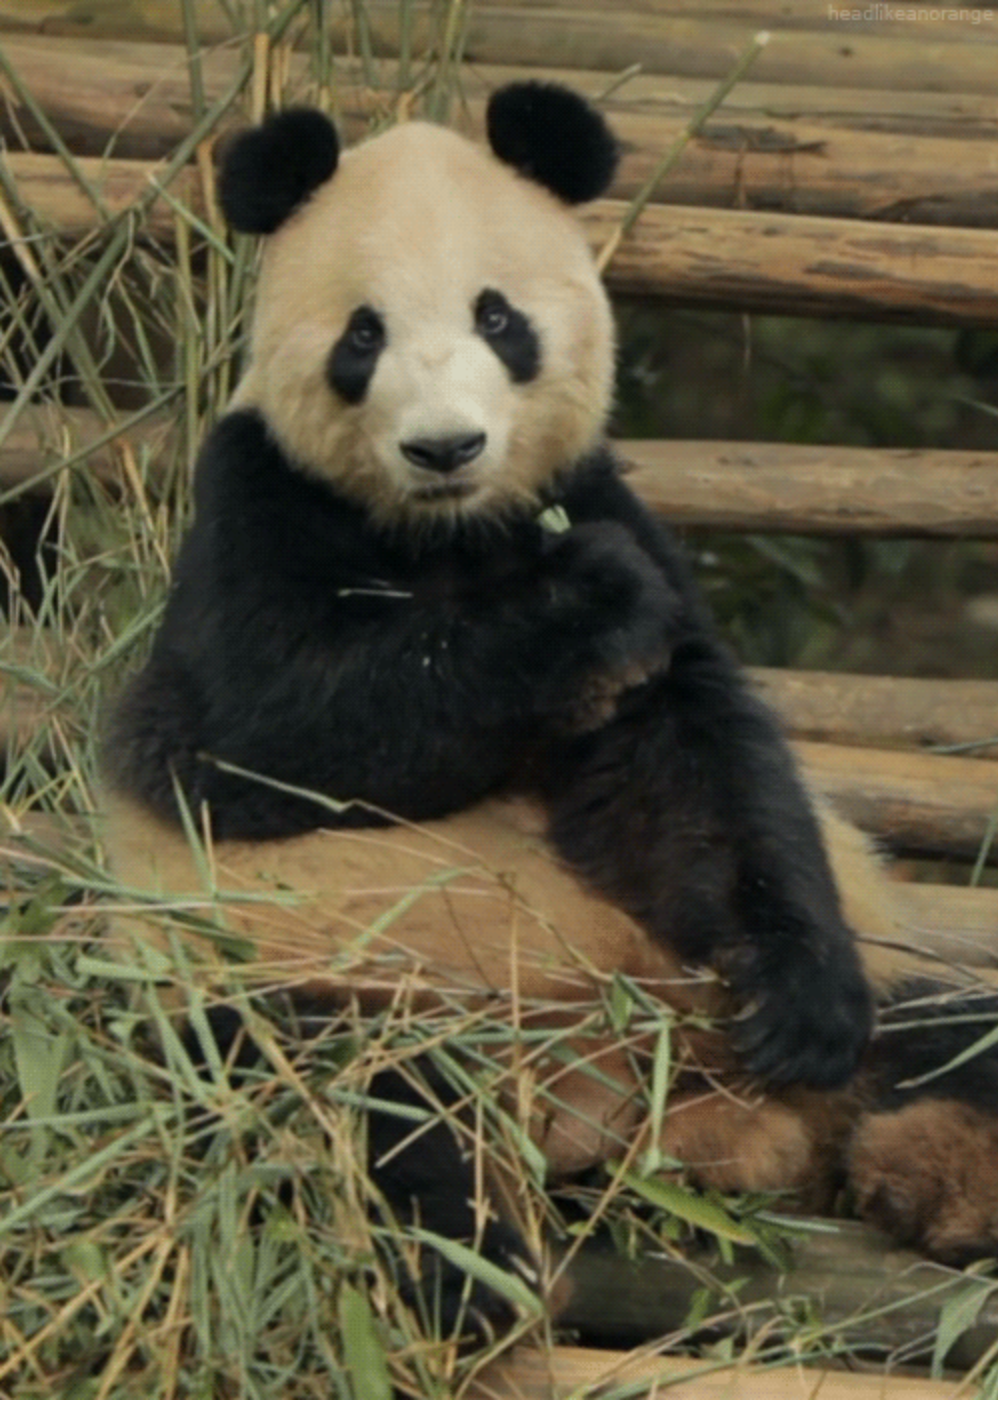

- Pandas is a package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive
- Data feels like excel spreadsheets

## Why use Pandas

- Easy handling of missing data
- Size mutability
- Automatic and explicit data alignment
- Powerful, flexible group by functionality 

### Other Reasons

- Intelligent label-based slicing
- Fancy Indexing and subsetting
- Intuitive merging and joining data sets
- Flexible reshaping and pivoting of data sets

## Getting Started

### Importing the Module

In [3]:
import pandas as pd

### Allowing Graphics to Show in Jupyter Notebook

In [4]:
%matplotlib inline

## Series

- 1 dimensional labeled array
    + Can hold any data type
    
```python
>>> s = pd.Series(data, index=index)
```

#### Creating A Series Example

In [5]:
import numpy as np
data = np.random.randn(5)

In [6]:
series = pd.Series(data)
series

0   -1.498169
1   -0.235989
2    1.423290
3    0.005897
4    0.603988
dtype: float64

## DataFrame

- 2 dimensional labeled data structure with columns of varying type
    + like a Excel spreadsheet or database table

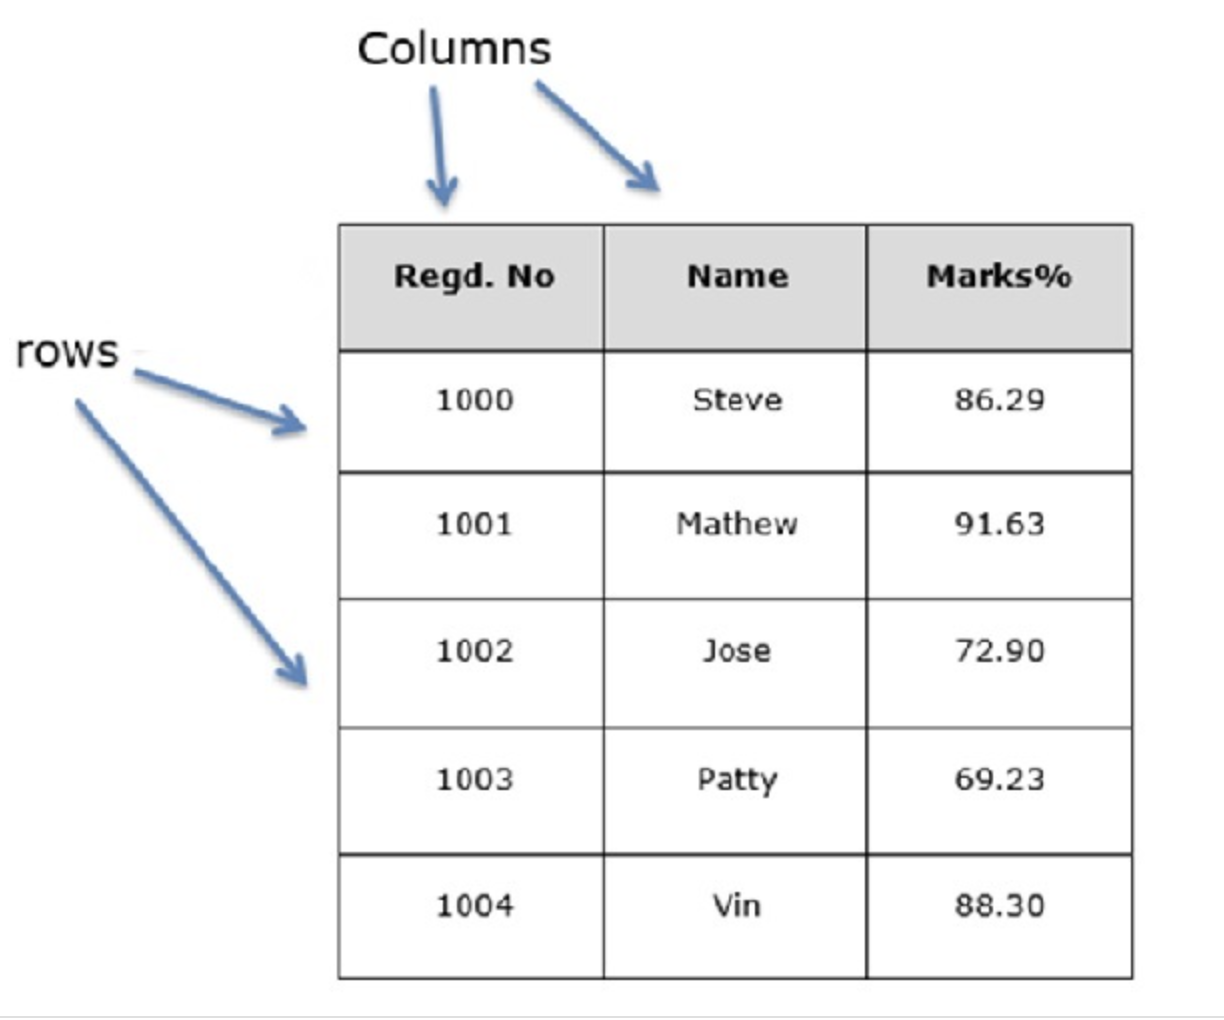

#### DataFrame Example

In [7]:
data = [[1,2,3], [3,4,None]]
fields = ['field1', 'field2', 'field3']

In [8]:
df = pd.DataFrame(data, columns=fields)
df


,field1,field2,field3
0,1,2,3.0
1,3,4,NaN


## Pandas Basics

In [9]:
df = pd.read_csv("/arcgis/home/devsummit/data/iris.csv")

### Peeking at Data

- Display only a small portion of data to understand what you have
- You can look at the top and bottom of the data

In [10]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
df.shape

(150, 5)

#### Slicing the DataFrame

- Selecting by index values for various ranges can be provided

In [13]:
df[23:31:3]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
23,5.1,3.3,1.7,0.5,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa


### Describing Data

- helps get a sense of data
    + provides the standard deviation, min, max, and break down of values for numeric data
- provides basic statistics of a dataset

In [14]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Shuffling Data

- When data is loading in order it's a good practice to shuffle it up before sampling.

In [15]:
df = (df
      .sample(frac=1)
      .reset_index(drop=True))
df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,6.4,3.1,5.5,1.8,Iris-virginica
1,6.5,3.0,5.2,2.0,Iris-virginica
2,5.8,2.7,4.1,1.0,Iris-versicolor
3,5.1,3.8,1.9,0.4,Iris-setosa
4,7.7,3.8,6.7,2.2,Iris-virginica


### DataFrame Columns

- DataFrames store information about the names and data types(dtypes)

In [16]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

- Accessing the data type information

In [17]:
df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

### Accessing the Data

- Zero based indexing (like most of Python)
- Use `iloc` to access a row
- Use `['<column name>']` to access a column

#### Example Accessing a Single Row

In [18]:
df.iloc[7]

SepalLength                6.6
SepalWidth                 2.9
PetalLength                4.6
PetalWidth                 1.3
Name           Iris-versicolor
Name: 7, dtype: object

#### Example Selecting Columns

In [19]:
df[['SepalLength', 'Name']].head()

,SepalLength,Name
0,6.4,Iris-virginica
1,6.5,Iris-virginica
2,5.8,Iris-versicolor
3,5.1,Iris-setosa
4,7.7,Iris-virginica


#### Example: Accessing a Single Value

In [20]:
df.Name.iloc[0]

'Iris-virginica'

### Slicing 

- Slicing like in lists, worlds on the `iloc` method
- Syntax is as follows:

```
    df.iloc[<start index> : <stop index> : <step size>]
```

In [21]:
df.iloc[1:16:3]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
1,6.5,3.0,5.2,2.0,Iris-virginica
4,7.7,3.8,6.7,2.2,Iris-virginica
7,6.6,2.9,4.6,1.3,Iris-versicolor
10,4.8,3.0,1.4,0.3,Iris-setosa
13,5.7,4.4,1.5,0.4,Iris-setosa


### Method Chaining

- Calling one method after another

In [22]:
df = (
    df
    .rename(columns=str.lower)
    .assign(
        name=lambda x: x['name'].str.lower()
    )
)

df.head()

,sepallength,sepalwidth,petallength,petalwidth,name
0,6.4,3.1,5.5,1.8,iris-virginica
1,6.5,3.0,5.2,2.0,iris-virginica
2,5.8,2.7,4.1,1.0,iris-versicolor
3,5.1,3.8,1.9,0.4,iris-setosa
4,7.7,3.8,6.7,2.2,iris-virginica


### Working with Date/Time

- Pandas handles datetime values and creating datatime values pretty use
    + use `pd.to_datetime()`

#### Example: Date/Time Spread Across Many Columns

In [23]:
data = [[12, 25,2017,10], [1,15,2018,11], [3,7,2018, 14]]
df = pd.DataFrame(data, columns=['month', 'day', 'year', 'hour'])
df

,month,day,year,hour
0,12,25,2017,10
1,1,15,2018,11
2,3,7,2018,14


In [24]:
# %load solutions/sol12.py
df['DateTimeWithHours'] = pd.to_datetime(df)
df

,month,day,year,hour,DateTimeWithHours
0,12,25,2017,10,2017-12-25 10:00:00
1,1,15,2018,11,2018-01-15 11:00:00
2,3,7,2018,14,2018-03-07 14:00:00


In [25]:
df.dtypes

month                         int64
day                           int64
year                          int64
hour                          int64
DateTimeWithHours    datetime64[ns]
dtype: object

#### Date/Time as an Index

- Date/Time values can be used to index a DataFrame
- Helpful for time series data

In [26]:
data = [[12, 25,2017,10], [1,15,2018,11], [3,7,2018, 14]]
df = pd.DataFrame(data, columns=['month', 'day', 'year', 'hour'])

In [27]:
df.index = pd.to_datetime(df[['month','day','year']])
df.loc[pd.to_datetime('2017-12-25')]

month      12
day        25
year     2017
hour       10
Name: 2017-12-25 00:00:00, dtype: int64

### Categorical Data

- Sort of like domain values in Feature Classes
- used when you have a fixed number of values in a `Series`

#### Example of Categorical Data

In [28]:
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df.head()

,value,group
0,45,40 - 49
1,54,50 - 59
2,55,50 - 59
3,15,10 - 19
4,45,40 - 49


In [29]:
df.dtypes

value       int64
group    category
dtype: object

#### Efficiently Create Categorical Data

In [30]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/drinks.csv'

In [31]:
drinks = pd.read_csv(url, dtype={'continent' : 'category'})
drinks.continent.cat.categories

Index(['AF', 'AS', 'EU', 'OC', 'SA'], dtype='object')

In [32]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [33]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   country                       193 non-null    object  
 1   beer_servings                 193 non-null    int64   
 2   spirit_servings               193 non-null    int64   
 3   wine_servings                 193 non-null    int64   
 4   total_litres_of_pure_alcohol  193 non-null    float64 
 5   continent                     170 non-null    category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 8.1+ KB


### Managing Data Types

- use dictionaries to cast all data at once
    + prevent multiple walks over the datasets 

In [34]:
# %load solutions/sol15.py
drinks = pd.read_csv(url)
drinks = drinks.astype({'beer_servings' : float, 
                        'spirit_servings' : float,
                        'continent' : 'category'
                       })
drinks.dtypes 


country                           object
beer_servings                    float64
spirit_servings                  float64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [35]:
drinks = drinks.astype({'beer_servings' : float, 
                        'spirit_servings' : float,
                        'continent' : 'category'
                       })
drinks.dtypes 

country                           object
beer_servings                    float64
spirit_servings                  float64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

### General Statistical Operations

- Pandas provides basic and advanced statistics
- Aggregations should be performed in mass, especially on large datasets

#### Aggregations on a Series

In [36]:
drinks.beer_servings.agg(['mean', 'min', 'max'])

mean    106.160622
min       0.000000
max     376.000000
Name: beer_servings, dtype: float64

#### Aggregations on a DataFrame

In [37]:
drinks1 = drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]
drinks1.agg(['mean', 'min', 'max'])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
mean,106.160622,80.994819,49.450777,4.717098
min,0.000000,0.000000,0.000000,0.000000
max,376.000000,438.000000,370.000000,14.400000


#### Aggregations on Grouped Data

In [38]:
drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,61.471698,0.0,376.0
AS,37.045455,0.0,247.0
EU,193.777778,0.0,361.0
OC,89.687500,0.0,306.0
SA,175.083333,93.0,333.0


### Visualization

- provides basic visualization 
- built on matplotlib

#### Simple Example

<AxesSubplot: xlabel='A'>

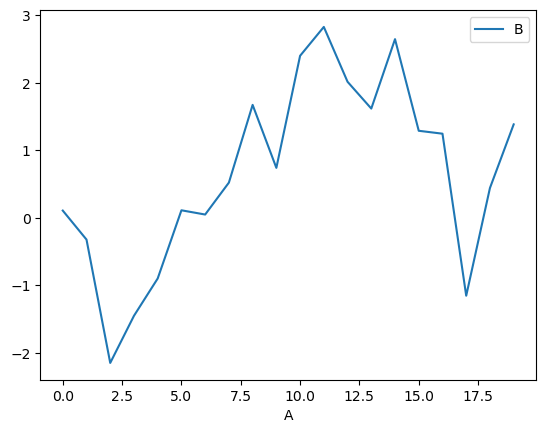

In [39]:
import numpy as np
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

In [40]:
listings = pd.read_csv("/arcgis/home/devsummit/data/listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [41]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

<AxesSubplot: xlabel='bedrooms', ylabel='reviews_per_month'>

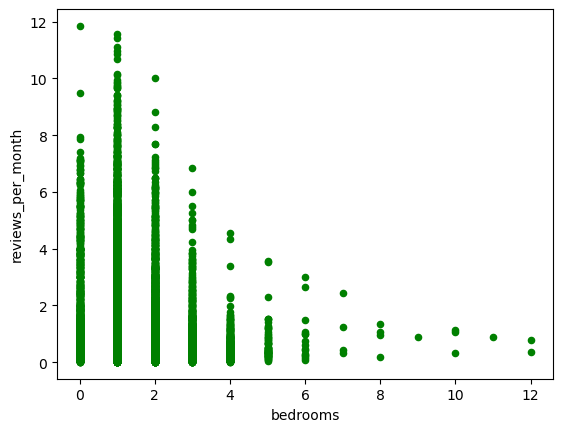

In [42]:
listings.plot.scatter(x='bedrooms', y='reviews_per_month', c='green')

<AxesSubplot: xlabel='property_type'>

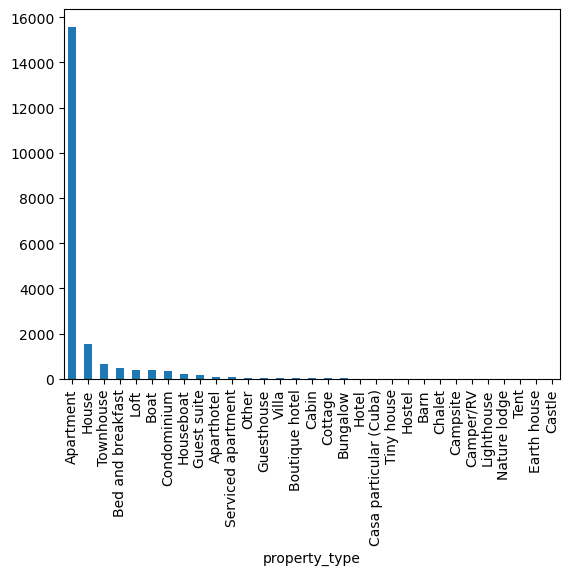

In [43]:
listings['property_type'].value_counts().plot.bar()